# Data  Collection

(1) Manually download images from google images
(2) Use python and web scrapping to automate downloading images from google. Here is the article on how you can do that: https://towardsdatascience.com/image-...
(3) Use a chrome extention called "Download All Images"
(4) Buy these images from third party vendor who is selling images database. Sometimes if a company is in sports or news domain they might have internal database of these images. You can work with engineering team that owns that database and get an access of those images

# Data Cleaning


In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
img = cv2.imread('/home/alok/Documents/Image_Processing/Sports_celeb_Dataset/test.jpg')
img.shape

(1421, 800, 3)

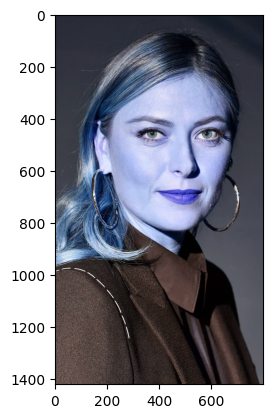

In [17]:
plt.imshow(img)

In [18]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1421, 800)

In [19]:
gray

array([[ 54,  50,  48, ...,  29,  29,  29],
       [ 54,  50,  48, ...,  29,  29,  29],
       [ 54,  50,  48, ...,  29,  29,  29],
       ...,
       [100,  36, 106, ..., 107, 107, 107],
       [ 61,  27,  95, ..., 107, 107, 107],
       [ 38,  67,  85, ..., 108, 108, 108]], dtype=uint8)

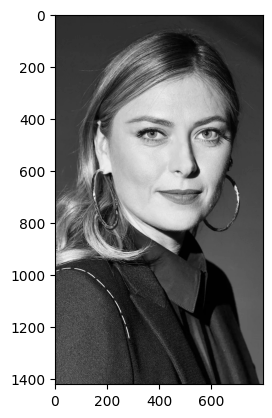

In [20]:
plt.imshow(gray, cmap='gray')

https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html

https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml

In [21]:
face_cascade = cv2.CascadeClassifier('opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[192, 245, 551, 551]], dtype=int32)

In [22]:
(x,y,w,h) = faces[0]
x,y,w,h

(192, 245, 551, 551)

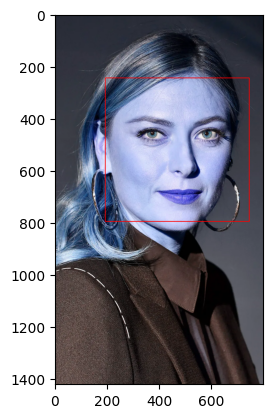

In [23]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

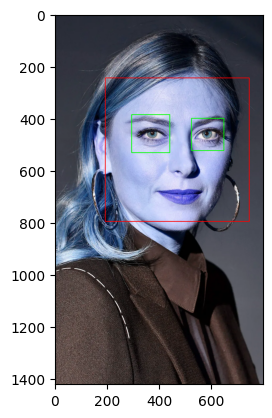

In [24]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

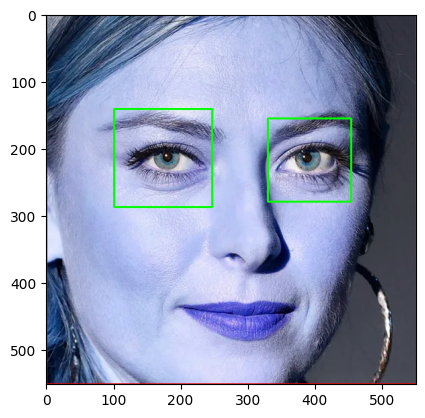

In [25]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [26]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

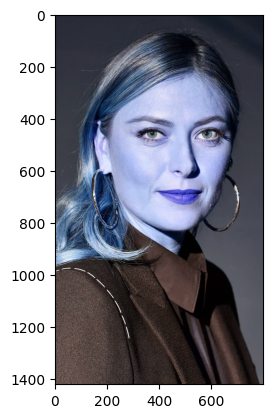

In [27]:
original_image = cv2.imread('Sports_celeb_Dataset/test.jpg')
plt.imshow(original_image)

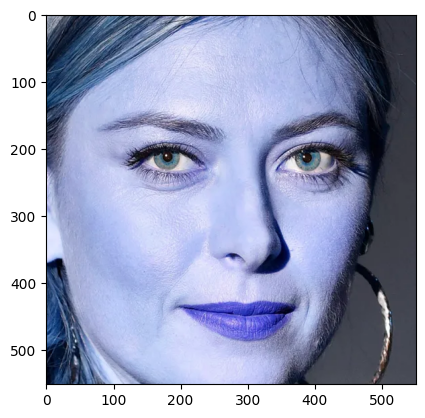

In [70]:
cropped_image = get_cropped_image_if_2_eyes('Sports_celeb_Dataset/test.jpg')
plt.imshow(cropped_image)

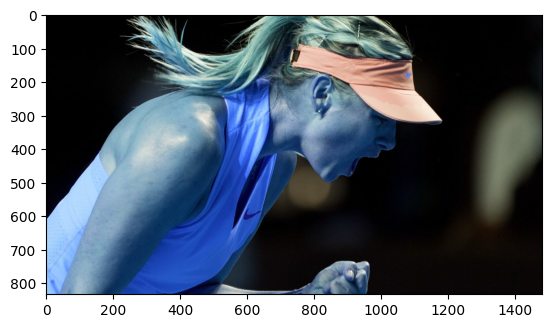

In [30]:

org_image_obstructed = cv2.imread('Sports_celeb_Dataset/test1.jpg')
plt.imshow(org_image_obstructed)

In [31]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('Sports_celeb_Dataset/test1.jpg')
cropped_image_no_2_eyes

In [61]:
path_to_data = "Sports_celeb_Dataset/"
path_to_cr_data = "Sports_celeb_Dataset/cropped/"

In [62]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
        
img_dirs

['Sports_celeb_Dataset/CR7',
 'Sports_celeb_Dataset/LM10',
 'Sports_celeb_Dataset/SACHIN',
 'Sports_celeb_Dataset/KOHLI',
 'Sports_celeb_Dataset/NOVAK',
 'Sports_celeb_Dataset/ROJAR']

In [63]:
import shutil
# Create new folder if it did not exist
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [48]:
# for img_dir in img_dirs:
#     count = 1
#     celebrity_name = img_dir.split('/')[-1]
#     print(celebrity_name)
    

In [64]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
#     print(img_dir )
    count = 1
    #to find class
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    #
    celebrity_file_names_dict[celebrity_name] = []
    
    
    #Scan through all the files
    for entry in os.scandir(img_dir):
#         print(entry)
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            
            #create Path for the folder
            cropped_folder = path_to_cr_data + celebrity_name
            
            #Create the folder if it does not exist
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                
                #append path for renaming files later
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            #create file name and file path
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            #Save the image
            cv2.imwrite(cropped_file_path, roi_color)
            
            #a dictionary: maintains all file name of same class
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1   

CR7

Generating cropped images in folder:  Sports_celeb_Dataset/cropped/CR7

LM10

Generating cropped images in folder:  Sports_celeb_Dataset/cropped/LM10

SACHIN

Generating cropped images in folder:  Sports_celeb_Dataset/cropped/SACHIN

KOHLI

Generating cropped images in folder:  Sports_celeb_Dataset/cropped/KOHLI

NOVAK

Generating cropped images in folder:  Sports_celeb_Dataset/cropped/NOVAK

ROJAR

Generating cropped images in folder:  Sports_celeb_Dataset/cropped/ROJAR


# Do Some Manual Data Cleaning If needed

In [81]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'CR7': ['Sports_celeb_Dataset/cropped/CR7/CR71.png',
  'Sports_celeb_Dataset/cropped/CR7/CR72.png',
  'Sports_celeb_Dataset/cropped/CR7/CR73.png',
  'Sports_celeb_Dataset/cropped/CR7/CR74.png',
  'Sports_celeb_Dataset/cropped/CR7/CR75.png',
  'Sports_celeb_Dataset/cropped/CR7/CR76.png',
  'Sports_celeb_Dataset/cropped/CR7/CR77.png',
  'Sports_celeb_Dataset/cropped/CR7/CR78.png',
  'Sports_celeb_Dataset/cropped/CR7/CR79.png',
  'Sports_celeb_Dataset/cropped/CR7/CR710.png',
  'Sports_celeb_Dataset/cropped/CR7/CR711.png',
  'Sports_celeb_Dataset/cropped/CR7/CR712.png',
  'Sports_celeb_Dataset/cropped/CR7/CR713.png',
  'Sports_celeb_Dataset/cropped/CR7/CR714.png',
  'Sports_celeb_Dataset/cropped/CR7/CR715.png',
  'Sports_celeb_Dataset/cropped/CR7/CR716.png',
  'Sports_celeb_Dataset/cropped/CR7/CR717.png',
  'Sports_celeb_Dataset/cropped/CR7/CR718.png',
  'Sports_celeb_Dataset/cropped/CR7/CR719.png',
  'Sports_celeb_Dataset/cropped/CR7/CR720.png',
  'Sports_celeb_Dataset/cropped/CR7/CR721.

In [82]:

class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'CR7': 0, 'LM10': 1, 'SACHIN': 2, 'KOHLI': 3, 'NOVAK': 4, 'ROJAR': 5}

Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [66]:
# pip install PyWavelets

Defaulting to user installation because normal site-packages is not writeable



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:00:01






[notice] A new release of pip is available: 23.0 -> 24.0

[notice] To update, run: python3 -m pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [83]:
import numpy as np
import pywt
import cv2  

In [84]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

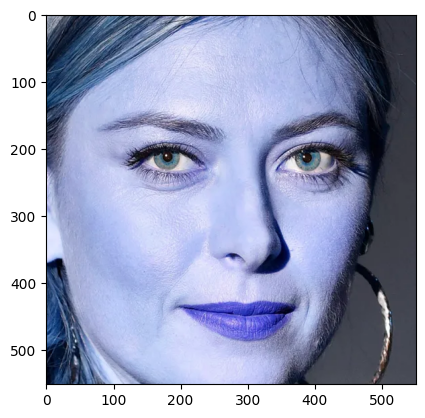

In [85]:
cropped_img = get_cropped_image_if_2_eyes('Sports_celeb_Dataset/test.jpg')
plt.imshow(cropped_img)

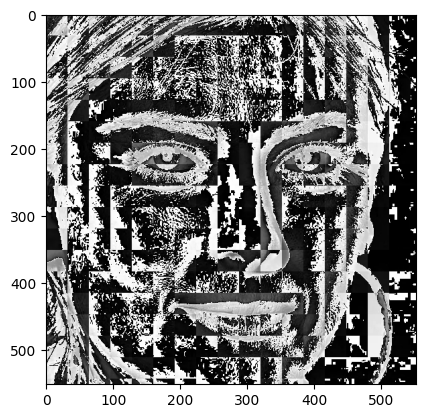

In [86]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [88]:
# celebrity_file_names_dict 

In [89]:
for celebrity_name, training_files in celebrity_file_names_dict.items():
    print(celebrity_name)

CR7

LM10

SACHIN

KOHLI

NOVAK

ROJAR


In [97]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        #read img
        img = cv2.imread(training_image)
        if img is None:
            continue
        #Scaling Img
        scalled_raw_img = cv2.resize(img, (32, 32))
        #create wavelet of that img
        img_har = w2d(img,'db1',5)
        #Scaling wavelet img
        scalled_img_har = cv2.resize(img_har, (32, 32))
        #Make vertical stack of both img array
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        #add level
        y.append(class_dict[celebrity_name])  

In [98]:
len(X[0])

4096

In [99]:
32*32*3 + 32*32

4096

In [100]:
X[0]

array([[ 54],
       [ 46],
       [ 39],
       ...,
       [244],
       [246],
       [244]], dtype=uint8)

In [101]:
# X=X/255

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [104]:
# X[0]

In [103]:
y[0]

0

In [105]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(213, 4096)

In [127]:
# pip install -U scikit-learn

In [112]:

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6111111111111112

In [114]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support



           0       0.73      0.67      0.70        12

           1       0.57      0.57      0.57         7

           2       0.50      0.67      0.57         9

           3       0.83      0.91      0.87        11

           4       0.45      0.56      0.50         9

           5       0.00      0.00      0.00         6



    accuracy                           0.61        54

   macro avg       0.51      0.56      0.53        54

weighted avg       0.56      0.61      0.58        54




In [115]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [116]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [117]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/home/alok/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

  warnings.warn(

/home/alok/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

  warnings.warn(

/home/alok/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

  warnings.warn(

/home/alok/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' wa

,model,best_score,best_params
0,svm,0.704435,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.447379,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.760887,{'logisticregression__C': 1}


In [118]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [119]:
best_estimators['svm'].score(X_test,y_test)

0.6296296296296297

In [120]:
best_estimators['random_forest'].score(X_test,y_test)

0.48148148148148145

In [121]:
best_estimators['random_forest'].score(X_test,y_test)

0.48148148148148145

In [122]:
best_clf = best_estimators['svm']

In [123]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  4,  0,  0,  1],
       [ 1,  6,  0,  0,  0,  0],
       [ 1,  0,  6,  0,  1,  1],
       [ 0,  0,  0, 10,  1,  0],
       [ 0,  2,  1,  1,  4,  1],
       [ 0,  1,  1,  0,  3,  1]])

In [126]:
# pip install seaborn

Text(95.72222222222221, 0.5, 'Truth')

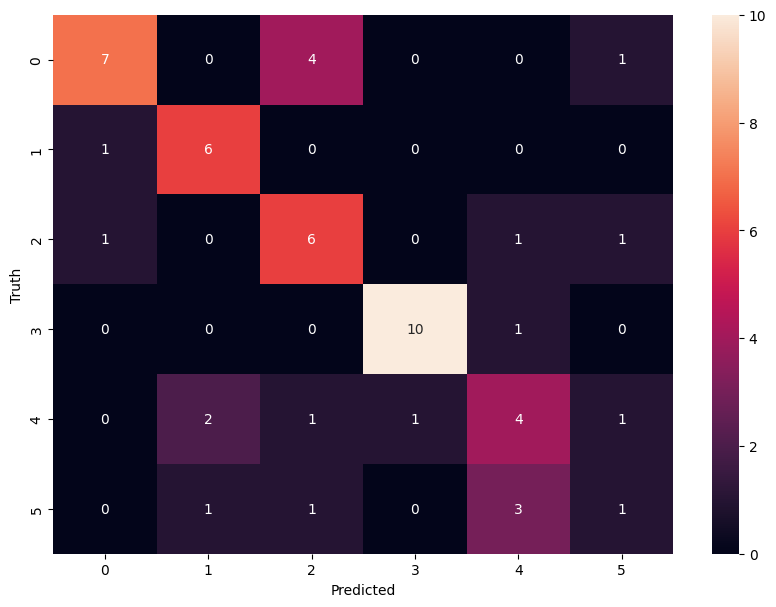

In [128]:

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [129]:
class_dict

{'CR7': 0, 'LM10': 1, 'SACHIN': 2, 'KOHLI': 3, 'NOVAK': 4, 'ROJAR': 5}

In [131]:
# !pip install joblib

In [132]:

import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [133]:

import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))